In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Trump data


In [11]:
# Source: 'twitterscraper from:RealDonaldTrump --output=trump.json'
trump = pd.read_json('data/trump.json')


In [4]:
trump.shape

(38397, 21)

In [12]:
trump.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url'],
      dtype='object')

## Bolsonaro data 

In [ ]:
# Source: 'twitterscraper from:@jairbolsonaro --output=bolsonaro.json'
trump = pd.read_json('data/trump.json')


## Functions

In [6]:
#Make text for twitter lowercase to search for matching expressions
trump['text_lower'] = trump.text.str.lower()

#### Count all fake news expressions

In [7]:

def fake_news_mentions(data, match = []):
    #find patterns
    for i in match:
        data[i] = data['text_lower'].str.contains(i)

    # Convert True/False values to 0/1
    data[match] = data[match].astype('int32')
        
    # Create column with total fake_news
    data['fake_news_mention'] = data[match].sum(axis=1)
    print('Total fake_news labels: {}\n'.format(data.fake_news_mention.sum()))
    
    # Print value counts for expressions
    for i in match:
        print('{}\n'.format(data[i].value_counts()))


#### Aggregate tweets by day, vis & basic summary

In [8]:

def aggregate_tweets_day(data, title_vis):
    
    global fake_news
    
    d = {'timestamp':'tweets_per_day'}
    new_df = data.groupby(data.timestamp.dt.date).\
    agg({'timestamp':'count', 'fake_news_mention':'sum'}).rename(columns=d)
    
    fake_news = new_df[new_df['fake_news_mention'] > 0]
    fake_news.plot(style='o', alpha = 0.5)
    
    plt.title(title_vis)
    
    print('- Total tweets mentioning fake news expressions between {}-{}: {}'.\
          format(data.timestamp.min(), data.timestamp.max(),fake_news.fake_news_mention.sum()))
    print('- First tweet: {}'.format(fake_news.index.min()))
    print('- Last tweet: {}'.format(fake_news.index.max()))
    
    res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
    print('- Average frequency: {0:.2f} days'.format(res.mean()))
    
    

## Trump

In [9]:
trump_expressions = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia', 'enemy of the people']
fake_news_mentions(trump, trump_expressions)

Total fake_news labels: 562

0    37885
1      512
Name: fake news, dtype: int64

0    38396
1        1
Name: false news, dtype: int64

0    38379
1       18
Name: fake media, dtype: int64

0    38397
Name: falsenews, dtype: int64

0    38397
Name: fakemedia, dtype: int64

0    38366
1       31
Name: enemy of the people, dtype: int64



- Total tweets mentioning fake news expressions between 2009-05-04 18:54:25-2019-11-11 23:58:14: 562
- First tweet: 2016-11-16
- Last tweet: 2019-11-11
- Average frequency: 19.42 days


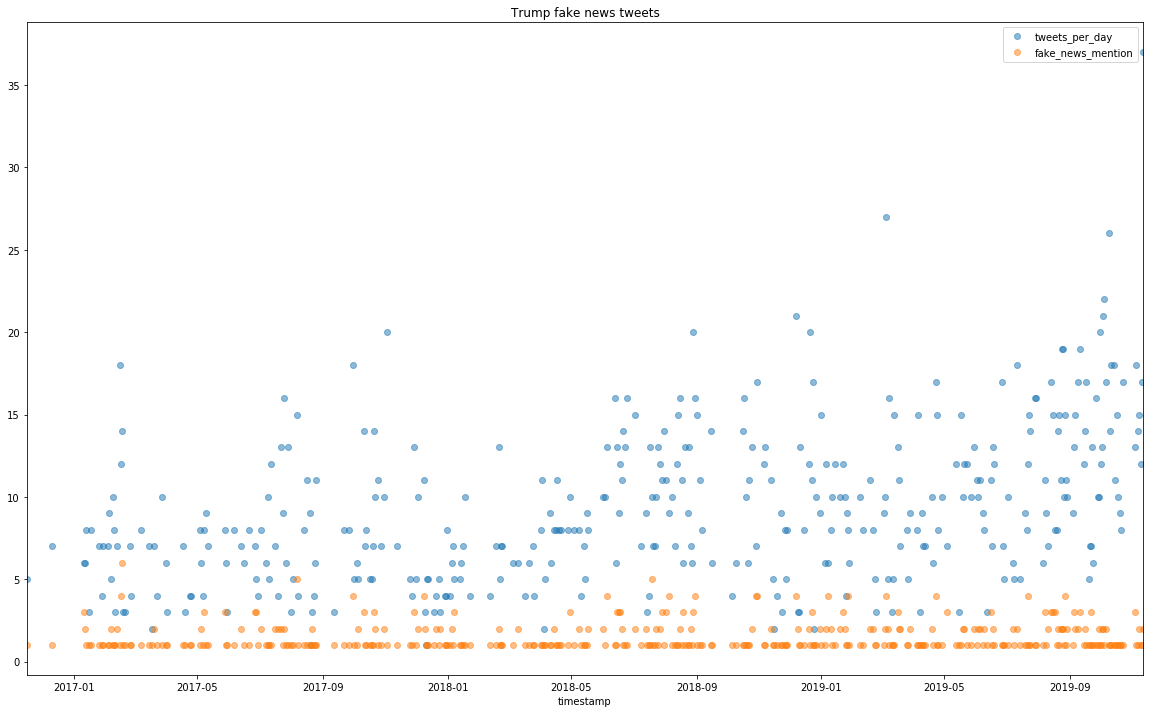

In [10]:
aggregate_tweets_day(trump, "Trump fake news tweets")